# Shot Type Classification for Ads

## Model Evaluation

In [4]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import load_model

from utils.utils import load_config
from utils.utils import predict_from_folder
from scripts.video_data_generator import VideoDataGenerator



/home/app/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


## Experiment settings

Set here the two variables in the following way:

- **CONFIG_YML:** assign the path to the config.yml file used for the experiment you want to evaluate
- **WEIGHTS:** assign the path to the model weights (.h5 file) you want to evaluate


In [5]:
experiments ={
    0:["../experiments/experiment_0/experiment0_GRU.yml","../experiments/expperiment_0/model.02-2.1634.h5"],
    1:["../experiments/experiment_1/experiment1_LSTM.yml","../experiments/experiment_1/model.04-2.1393.h5"],
    2:["../experiments/experiment_2/experiment2_LSTM_NoReg_Move.yml","../experiments/experiment_2/model.04-2.1352.h5"],
    3:["../experiments/experiment_3/experiment3_LSTM_data_aug.yml","../experiments/experiment_3/model.09-0.5953.h5"],
    4:["../experiments/experiment_4/experiment4_LSTM_CNN.yml","../experiments/experiment_4/model.07-0.5929.h5"]
}
CONFIG_YML, WEIGHTS = experiments[3]
config = load_config(CONFIG_YML)
config

{'data': {'directory': 'movie-shot-trailers/trailer',
  'batch_size': 2,
  'df_pickle_path': 'v1_split_trailer.pkl',
  'file2read': 'video',
  'df_file_column': 'path',
  'y_scale': 'scale_lab',
  'y_move': 'move_lab',
  'max_frames': 16,
  'image_size': [224, 224],
  'random_state': 42},
 'data_aug': {'video_prob': 1,
  'flip_prob': 0.3,
  'pep_sal_prob': 0.3,
  'distortion_prob': 0.3,
  'geometric_prob': 0.3},
 'model': {'weights': 'imagenet',
  'X3_dropout_rate': 0.2,
  'rnn_type': 'lstm',
  'rnn_units': 128,
  'X4_dropout_rate': 0.2,
  'scale_classes': 5,
  'move_classes': 4},
 'compile': {'optimizer': {'adam': {'learning_rate': 0.001}},
  'loss': {'outputs_scale': 'categorical_crossentropy',
   'outputs_move': 'categorical_crossentropy'},
  'loss_weights': {'outputs_scale': 0.45, 'outputs_move': 0.55},
  'metrics': {'outputs_scale': ['accuracy'],
   'outputs_move': {'f1_score': {'threshold': 0.5}}}},
 'trainable': {'X2_cnn_tdist': False,
  'X4_model_rnn': True,
  'outputs_scale': 

## Load model


In [6]:
model = load_model(WEIGHTS)
model.summary()

2022-12-22 21:38:17.130677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 21:38:17.193862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 21:38:17.194217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-22 21:38:17.195161: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_l (InputLayer)           [(None, 16, 224, 22  0           []                               
                                4, 3)]                                                            
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 16, 224, 224  0          ['input_l[0][0]']                
 ingOpLambda)                   , 3)                                                              
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 16, 224, 224  0           ['tf.__operators__.getitem[0][0]'
                                , 3)                             ]                            

## Get predictions from testing dataset

In [7]:
# (!) Don't touch this cell, will use the loaded model and
#     the function utils.predict_from_folder() to get 
#     model predictions and the corresponding true labels
#     so we can measure the accuracy
test_df = pd.read_csv(config['data']['test_csv_directory'])
scale_classes = test_df.scene_scale_label.unique().tolist()
move_classes = test_df.scene_movement_label.unique().tolist()

test_data_gen = VideoDataGenerator(
        val_df = test_df,
        file_col= config['data']['file_col'],
        batch_size = config['data']['batch_size'],
        y_col_scale= config['data']['y_col_scale'],
        y_col_movement= config['data']['y_col_movement'],
        mapping_scale= config['data']['mapping_scale'],
        mapping_movement= config['data']['mapping_movement'],
        max_frames= config['data']['max_frames'],
        img_size= config['data']['img_size'],
        augmentation_seq = False
    )

scale_preds,scale_tests, move_preds, move_tests = predict_from_folder.predict_labels(model, test_data_gen, scale_classes,move_classes)



2022-12-22 21:39:44.433829: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2022-12-22 21:39:45.410064: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 21:39:45.412726: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 21:39:45.412813: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-22 21:39:45.414379: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-22 21:39:45.414575: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


In [8]:
# Scale report
print(classification_report(y_true = scale_tests, y_pred = scale_preds, digits=4))


              precision    recall  f1-score   support

    scale_CS       0.83      0.79      0.81      1791
   scale_ECS       0.86      0.89      0.88      1636
    scale_FS       0.83      0.87      0.85      1632
    scale_LS       0.93      0.91      0.92      1346
    scale_MS       0.81      0.81      0.81      1743

    accuracy                           0.85      8148
   macro avg       0.85      0.85      0.85      8148
weighted avg       0.85      0.85      0.85      8148



In [9]:
# confusion matrix
def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = confusion_matrix(actual, predicted , normalize='pred')
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of ' + ds_type)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

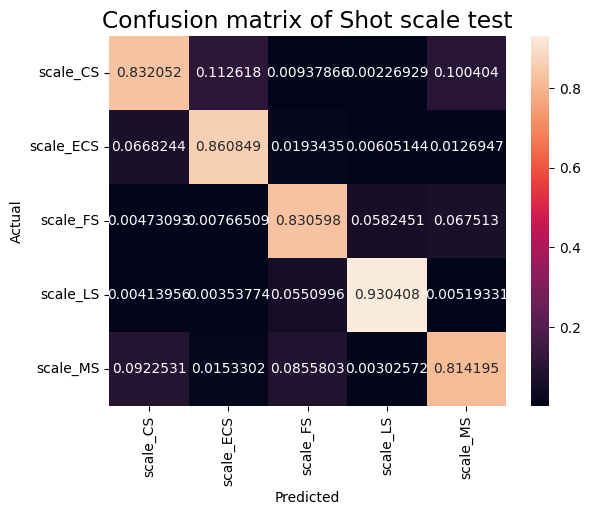

In [10]:
plot_confusion_matrix(actual = scale_tests, predicted= scale_preds, labels= scale_classes, ds_type='Shot scale test')

In [11]:
# Move report
print(classification_report(y_true = move_tests, y_pred= move_preds, digits=4))

              precision    recall  f1-score   support

 move_Motion       0.60      0.34      0.44      2385
   move_Pull       0.00      0.00      0.00        80
   move_Push       0.00      0.00      0.00       220
 move_Static       0.73      0.91      0.81      5463

    accuracy                           0.71      8148
   macro avg       0.33      0.31      0.31      8148
weighted avg       0.67      0.71      0.67      8148



/home/app/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/app/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/app/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


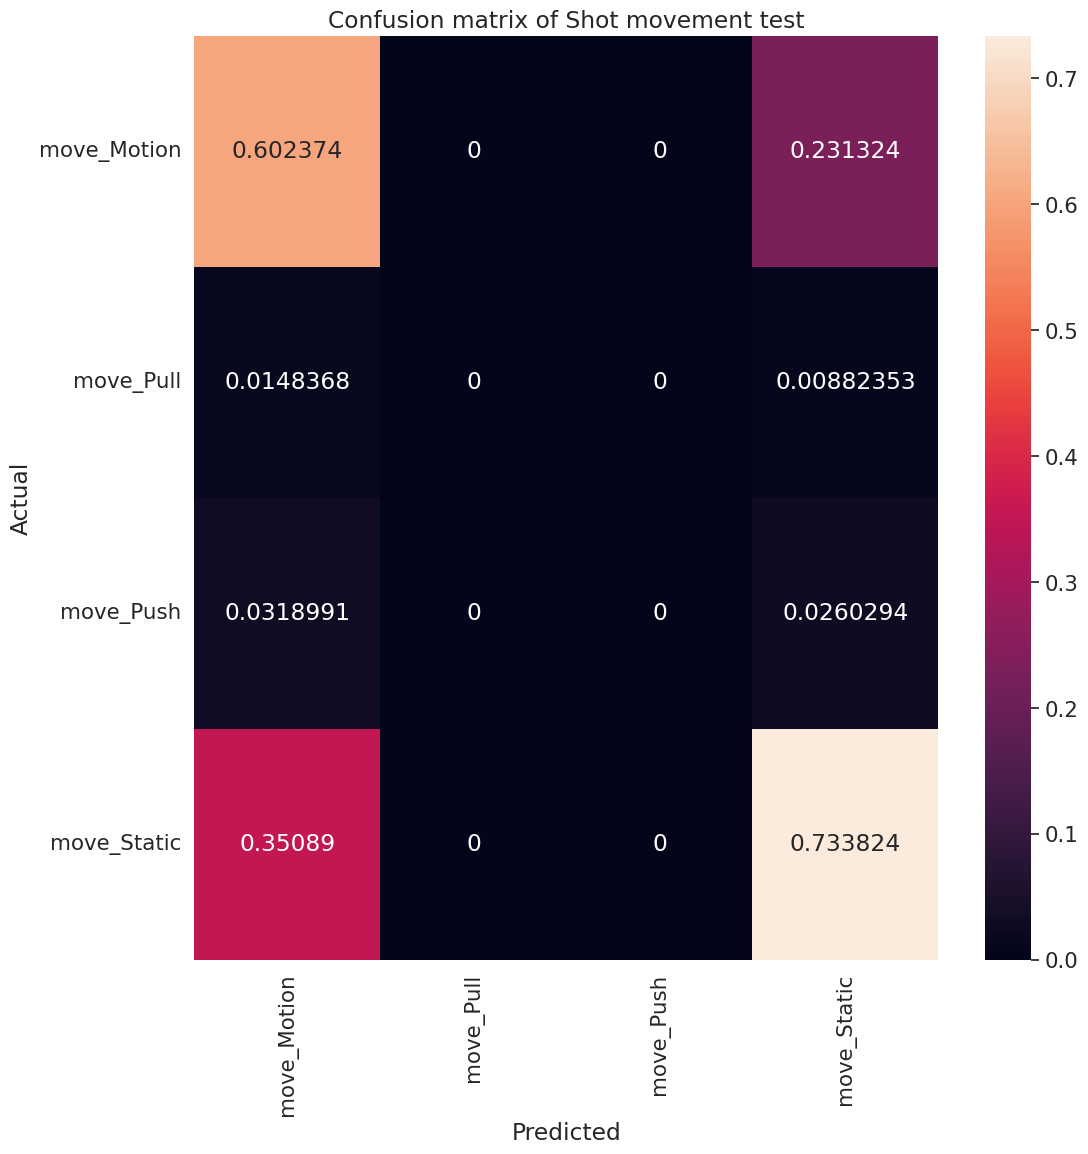

In [12]:
plot_confusion_matrix(actual = move_tests, predicted = move_preds, labels= move_classes, ds_type ='Shot movement test')